In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

**Using the fetch_20newsgroups dataset present in sklearn library and creating a model to detect the topics pertaining to 4 categories - *Atheism*, *Computer Graphics*, *Space* and *Religion***

In [2]:
categories = ['alt.atheism','talk.religion.misc','comp.graphics','sci.space']
remove = ('headers','footers','quotes')
newsgroup_train = fetch_20newsgroups(subset ='train',categories=categories,remove = remove)
newsgroup_test = fetch_20newsgroups(subset ='test',categories=categories,remove = remove)

In [3]:
newsgroup_train.filenames.shape, newsgroup_test.filenames.shape

((2034,), (1353,))

In [4]:
#printing on the next line
print("\n".join(newsgroup_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [5]:
#specifically looking for the target names of the first three entries
np.array(newsgroup_train.target_names)[newsgroup_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [6]:
# the different labels of the target are as follows
np.unique(newsgroup_train.target)

array([0, 1, 2, 3])

In [7]:
num_of_topics,num_top_words = 6, 8

**Preprocessing the Text:**

1. Removing Stopwords
2. Lemmatizing words and comparing it with the stemming approach
3. Using spacy to generate stop words and identifying the demerits of using spacy

In [8]:
from sklearn.feature_extraction import _stop_words
stop_words_sklearn = sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:20]

In [9]:
#stemming and lemmatization are used to generate the root form of words. 

#Lemmatization generates actual words and uses rules about a language, whereas stemming is a crude way to generate stop words. Stemming is faster. 

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk import stem
wnl = stem.WordNetLemmatizer()
poeter = stem.porter.PorterStemmer()

In [11]:
wordlist = ['feet','foot','footing','foots']

In [12]:
[wnl.lemmatize(word) for word in wordlist]

['foot', 'foot', 'footing', 'foot']

In [13]:
[poeter.stem(word) for word in wordlist]

['feet', 'foot', 'foot', 'foot']

In [14]:
wordlist1=['fly','flies','flying']
wordlist2=['organize','organizes','organizing','organized']
wordlist3=['universe','university']

In [15]:
[wnl.lemmatize(word) for word in wordlist1]

['fly', 'fly', 'flying']

In [16]:
[wnl.lemmatize(word) for word in wordlist2]

['organize', 'organizes', 'organizing', 'organized']

In [17]:
[wnl.lemmatize(word) for word in wordlist3]

['universe', 'university']

In [18]:
[poeter.stem(word) for word in wordlist1]

['fli', 'fli', 'fli']

In [19]:
[poeter.stem(word) for word in wordlist2]

['organ', 'organ', 'organ', 'organ']

In [20]:
[poeter.stem(word) for word in wordlist3]

['univers', 'univers']

In [21]:
import spacy

In [22]:
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.Defaults.create_lemmatizer()
[lemmatizer.lookup(word) for word in wordlist]

['feet', 'foot', 'footing', 'foots']

In [23]:
stop_words_spacy = sorted(list(nlp.Defaults.stop_words))[:20]

In [24]:
_stop_words.ENGLISH_STOP_WORDS - nlp.Defaults.stop_words

frozenset({'amoungst',
           'bill',
           'cant',
           'co',
           'con',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'eg',
           'etc',
           'fill',
           'find',
           'fire',
           'found',
           'hasnt',
           'ie',
           'inc',
           'interest',
           'ltd',
           'mill',
           'sincere',
           'system',
           'thick',
           'thin',
           'un'})

In [25]:
nlp.Defaults.stop_words - _stop_words.ENGLISH_STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

**Vectorizing the inputs**

Using Tfifd vectorizer and countvectorizer to convert the text corpus to input vectors. 



In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroup_train.data).todense()
vectors.shape


(2034, 26576)

In [27]:
print(len(vectors), vectors.shape)

2034 (2034, 26576)


In [28]:
vocab = np.array(vectorizer.get_feature_names())

In [29]:
vocab.shape

(26576,)

In [30]:
vocab[3000:3010]

array(['alexei', 'alexia', 'alexis', 'alfonso', 'alford', 'alfred', 'alg',
       'algebraic', 'algebraically', 'algeria'], dtype='<U80')

**Using SVD to generate input matrices**

In [31]:
%time U,s,vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 19s, sys: 4.84 s, total: 1min 24s
Wall time: 43.7 s


In [32]:
print(U.shape, s.shape, vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [33]:
#confirming the orthonormality of the 3 matrices
reconstructed_vectors =  U @ np.diag(s) @ vh
np.allclose(reconstructed_vectors,vectors)

True

In [34]:
#alternate way to find the orthonormality
np.linalg.norm(reconstructed_vectors-vectors)
np.allclose(reconstructed_vectors,vectors)

True

**Testing Orthonormality**

In [35]:
np.allclose(U.T @ U, np.eye(U.shape[0]))
np.allclose(vh @ vh.T, np.eye(vh.shape[0]))

True

**Plotting the singular values generated**

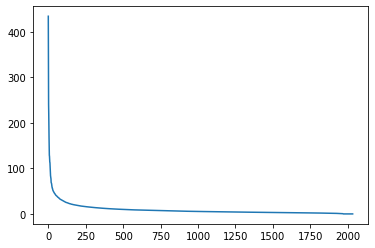

In [36]:
plt.plot(s)

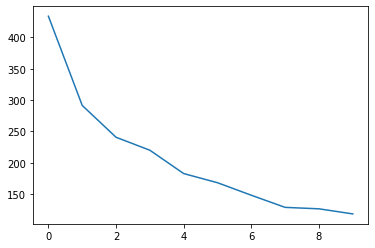

In [37]:
plt.plot(s[:10])

**Checking the topics**


In [38]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [39]:
show_topics(vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

**Topic Frequency and inverse document frequency (TF-IDF) approach to topic modeling**


In [40]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroup_train.data)


**Fitting to NMF method to convert vectors to input matrices**

In [41]:
m,n=vectors.shape
d=5  # num topics

clf = decomposition.NMF(n_components=d, random_state=1)
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [42]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

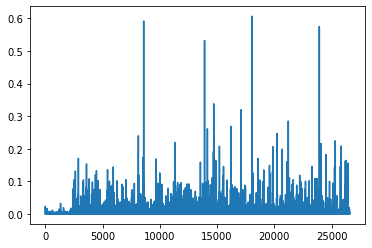

In [43]:
plt.plot(clf.components_[0])

In [44]:
clf.reconstruction_err_

43.712926057952785